## Supervised learning example

In this notebook we explore a classical machine learning approach to classification problems using a supervised approach and an algorithm called Support Vector Machine. We will use the library [scikit-learn](https://scikit-learn.org/stable/).

In this example we will use the `iris dataset` ([link to the dataset card](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)). 
This dataset is already included in the sklearn library, so we do not need to do any preprocessing.

In [ ]:
from sklearn import datasets
 
# Import the dataset
iris = datasets.load_iris()

Let us have a look at the shape of the dataset.

In [7]:
n_data_points = len(iris['data'])
n_features = len(iris['feature_names'])
feature_names = iris['feature_names']
targets = iris['target_names']
print(f'The dataset has {n_data_points} datapoints')
print(f'The data has {n_features} features, they are {feature_names}')
print(f'The data can have targets {targets}')

The dataset has 150 datapoints
The data has 4 features, they are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The data can have targets ['setosa' 'versicolor' 'virginica']


Consider only two features (sepal length and sepal width), so that we can plot the datapoints in the plane.

In [8]:
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

Let us define some SVM models with different kernels: different kernels will determine which shape the decision boundaries between different classes can take. They take various parameters, but all of them take the SVM regularization parameter C that determines how 'strict' or 'relaxed' the model is with respect to outliers.

In [9]:
from sklearn import svm

# We create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0  # This is the SVM regularization parameter
models = {
    'Linear': svm.SVC(kernel="linear", C=C),
    'RBF': svm.SVC(kernel="rbf", gamma=0.7, C=C),
    'Polynomial': svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
}

Let us divide the data into training and testing, we shuffle the data before splitting.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Fit all models on training and compute their accuracy on testing.

In [11]:
from sklearn.metrics import accuracy_score

for m in models:
    # Fit the model
    models[m].fit(X_train, y_train)
    predictions = models[m].predict(X_test)
    print(f'The accuracy for the {m} model is ', accuracy_score(y_test, predictions))

The accuracy for the Linear model is  0.7333333333333333
The accuracy for the RBF model is  0.7666666666666667
The accuracy for the Polynomial model is  0.7333333333333333


Plotting different decision boundaries

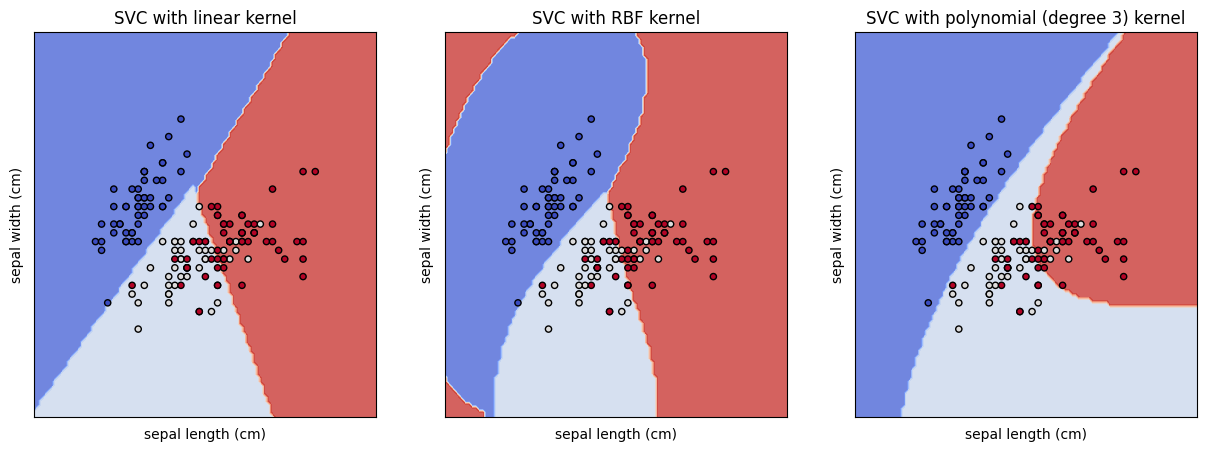

In [12]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Fit all models to the data
models_fitted = (clf.fit(X, y) for clf in models.values())

# Title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 1x3 grid for plotting.
fig, sub = plt.subplots(1, 3, figsize=(15,5))
# plt.subplots_adjust(wspace=0)


X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models_fitted, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Something to try next

Look at the Breast Cancer Wisconsin dataset in scikit-learn ([link to the dataset card](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer))
- What shape does this dataset have?
- Can you apply an SVM to this dataset to classify malicious from benign?